In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
idf = pd.DataFrame(data=iris.data, columns=iris.feature_names)
idf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [7]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
idf['target']= iris.target
idf['target'].unique()

array([0, 1, 2])

In [9]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
X = idf.drop('target',axis=1)
Y = idf.target
# Scaling of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [11]:
# As output of scaler is np array I'll transform back to df for easier exploration and plotting
X_scaled_df = pd.DataFrame(X_scaled,columns=['SepalLength','SepalWidth','PetalLength','PetalWidth'])
idf = pd.concat([X_scaled_df,Y],axis=1)
idf

SepalLength  SepalWidth  PetalLength  PetalWidth  target
0       0.222222    0.625000     0.067797    0.041667       0
1       0.166667    0.416667     0.067797    0.041667       0
2       0.111111    0.500000     0.050847    0.041667       0
3       0.083333    0.458333     0.084746    0.041667       0
4       0.194444    0.666667     0.067797    0.041667       0
..           ...         ...          ...         ...     ...
145     0.666667    0.416667     0.711864    0.916667       2
146     0.555556    0.208333     0.677966    0.750000       2
147     0.611111    0.416667     0.711864    0.791667       2
148     0.527778    0.583333     0.745763    0.916667       2
149     0.444444    0.416667     0.694915    0.708333       2

[150 rows x 5 columns]

In [12]:
X_scaled_df.describe()

SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      0.428704    0.440556     0.467458    0.458056
std       0.230018    0.181611     0.299203    0.317599
min       0.000000    0.000000     0.000000    0.000000
25%       0.222222    0.333333     0.101695    0.083333
50%       0.416667    0.416667     0.567797    0.500000
75%       0.583333    0.541667     0.694915    0.708333
max       1.000000    1.000000     1.000000    1.000000

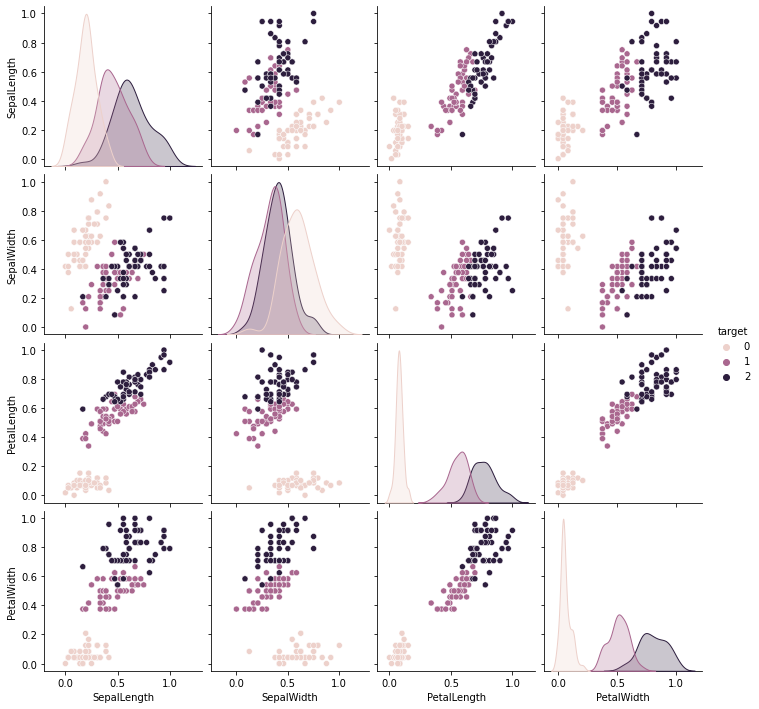

In [13]:
import matplotlib.pyplot as plt
#Let's do some visualisation
import seaborn as sns
sns.pairplot(idf, hue ='target')

<AxesSubplot:>

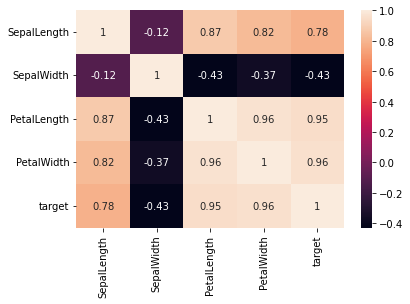

In [14]:
sns.heatmap(idf.corr(),annot=True)

In [15]:
# Let's now build a classifier and evaluate accuracy
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)
print("train sample size",x_train.shape)
print("test sample size",x_test.shape)

train sample size (105, 4)
test sample size (45, 4)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
iris_model = LogisticRegression()
iris_model.fit(x_train,y_train)

C:\Users\yuadh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = iris_model.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [18]:
cm = confusion_matrix(y_test, y_pred) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm, columns = ['setosa','versicolor','virginica'])
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

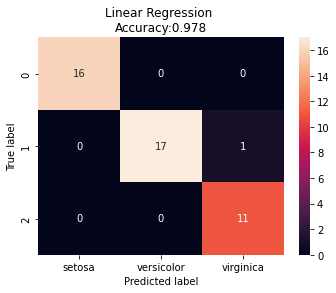

In [19]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Linear Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [51]:
# In this example the model overall accuracy on the test set 
# was 0.978 (Accurate predictions/All or True Positives/All).

# An insight we can get from the matrix is that the model was very accurate at 
# setosa and versicolor (True Positive/All = 1.0). However, accuracy for virginica was lower (11/12 = 0.917).

# If for any reason, successful classification of virginica was particularly 
# desired to the use case (e.g. it's a poisonous plant), then the confusion 
# matrix will help highlight differences between the classes.

#Important Note
# The Size of the confusion matrix is determined by the number of things we want to predict.

# A confusion matrix tells you what your machine learning algorithms did right and it did wrong. It will help us to 
# choose right model to take for prediciting